# __PCA__ (Principal Component Analysis) sample

- Popular method of __dimensionality reduction__.
- Combine multiple correlated explanatory variables into a less correlated explanatory variable.
  - Take the eigenvectors of the variance-covariance matrix.
- The following can be derived from the PCA results using sklearn:
  - components_: eigenvectors
  - explained_variance: principal component score
  - explained_variance_: eigenvalue
  - explained_variance_ratio_: contribution ratio

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = iris.target
df.loc[df['target'] == 0, 'target_name'] = 'setosa'
df.loc[df['target'] == 1, 'target_name'] = 'versicolor'
df.loc[df['target'] == 2, 'target_name'] = 'virginica'

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


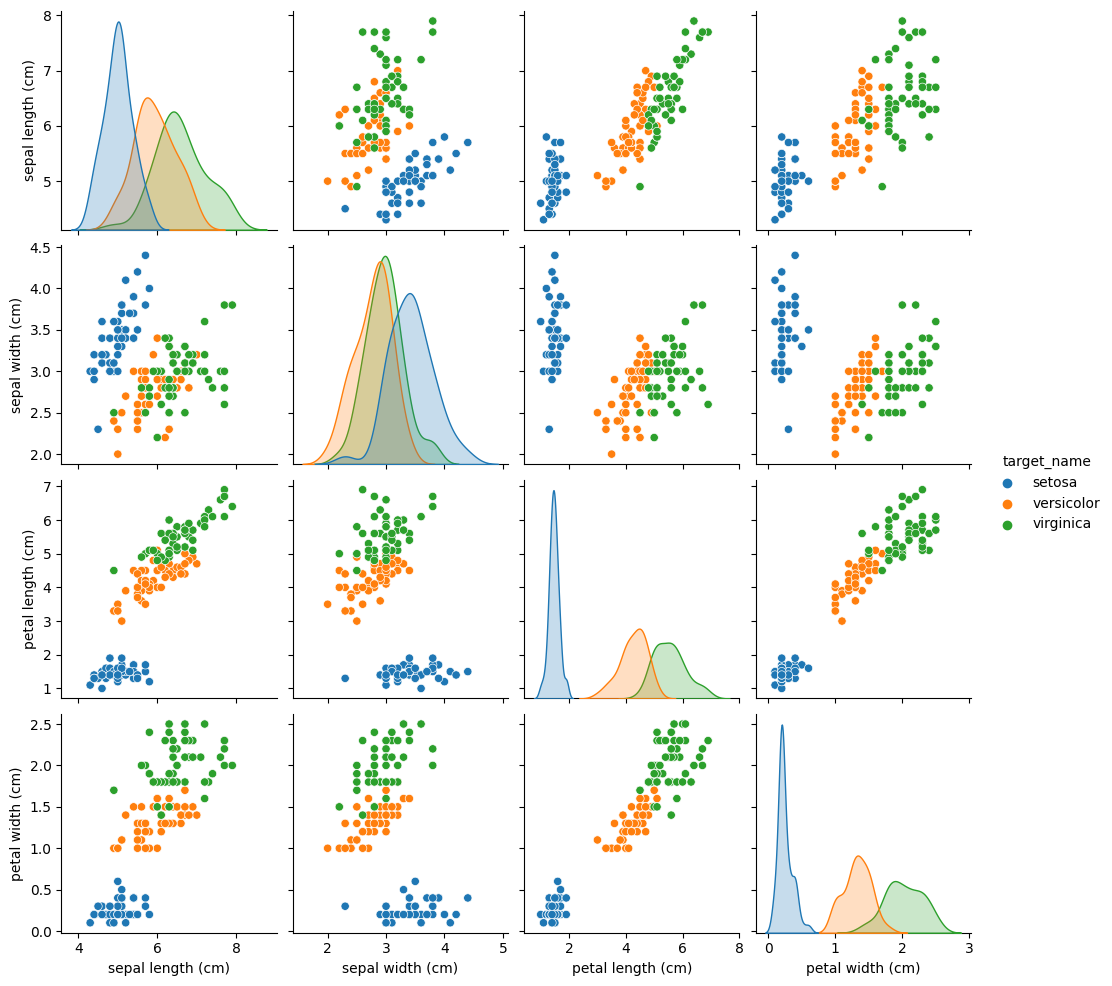

In [2]:
# Scatter plot matrix
sns.pairplot(
    df,
    vars=df.columns[:4],
    hue='target_name'
)

In [3]:
df.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'], dtype=object)

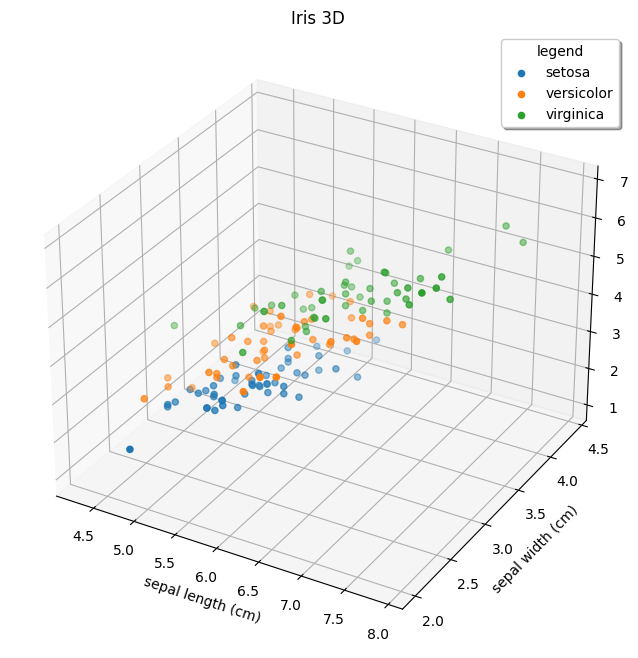

In [4]:
# Ref: 3D visualization (droppen petal width information)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for c in df['target_name'].unique():
    ax.scatter(
        df.iloc[:, 0][df['target_name'] == c],
        df.iloc[:, 1][df['target_name'] == c],
        df.iloc[:, 2][df['target_name'] == c],
        label = c
    )

ax.set_title('Iris 3D')
ax.legend(
    title='legend',
    loc=1,
    shadow=True
)
ax.set_xlabel(df.columns.values[0])
ax.set_ylabel(df.columns.values[1])
ax.set_zlabel(df.columns.values[2])

plt.show()

In [5]:
# PCA
pca = PCA(random_state=0)

X_pc = pca.fit_transform(df.iloc[:, 0:4])
pc_array = [f'PC{i + 1}' for i in range(len(X_pc[0]))]

df_pca = pd.DataFrame(
    X_pc,
    columns=pc_array
)

print(f'[Principal Components] {pca.n_components_}')
print(f'[Kept information] {np.sum(pca.explained_variance_ratio_)}')
display(df_pca)

[Principal Components] 4
[Kept information] 1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

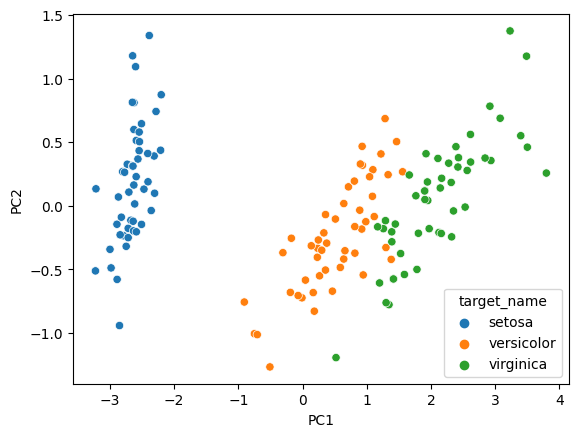

In [6]:
# Visualize using PC1 and PC2, which keep more information. (Visualize multi-dimensional data)
sns.scatterplot(
    data=df_pca,
    x=df_pca.columns.values[0],
    y=df_pca.columns.values[1],
    hue=df['target_name']
)

Four-dimensional data could be visualized in two dimensions.

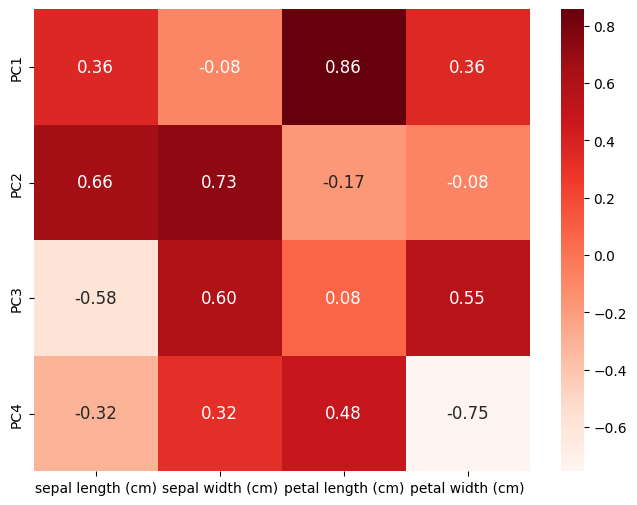

In [7]:
# Interpret Principal Components using heatmap.
fig_interpretation = plt.figure(figsize=(8, 6))
ax_interpretation = fig_interpretation.add_subplot(1, 1, 1)

sns.heatmap(
    # Create a heat map of eigenvectors.
    pca.components_,
    cmap='Reds',
    annot=True,
    annot_kws={'size': 12},
    fmt='.2f',
    xticklabels=[
        df.columns.values[0],
        df.columns.values[1],
        df.columns.values[2],
        df.columns.values[3],
    ],
    yticklabels=pc_array,
    ax=ax_interpretation
)
plt.show()